In [10]:
import pandas as pd
import numpy as np
from lxml import html
import quandl
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
api_key = open('quandlapikey.txt', 'r').read()

In [11]:
df = quandl.get("FMAC/HPI_AK")
df.head()

,NSA Value,SA Value
Date,,
1975-01-31,34.534800,34.726286
1975-02-28,35.037609,35.197119
1975-03-31,35.553993,35.589159
1975-04-30,36.094352,35.972835
1975-05-31,36.687281,36.390458


In [12]:
fifty_states = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')
print(fifty_states)

[   Name &postal abbreviation[12]                                  \
   Name &postal abbreviation[12] Name &postal abbreviation[12].1   
0                        Alabama                              AL   
1                         Alaska                              AK   
2                        Arizona                              AZ   
3                       Arkansas                              AR   
4                     California                              CA   
5                       Colorado                              CO   
6                    Connecticut                              CT   
7                       Delaware                              DE   
8                        Florida                              FL   
9                        Georgia                              GA   
10                        Hawaii                              HI   
11                         Idaho                              ID   
12                      Illinois               

In [13]:
fifty_states[0].iloc[:, 1]

0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CT
7     DE
8     FL
9     GA
10    HI
11    ID
12    IL
13    IN
14    IA
15    KS
16    KY
17    LA
18    ME
19    MD
20    MA
21    MI
22    MN
23    MS
24    MO
25    MT
26    NE
27    NV
28    NH
29    NJ
30    NM
31    NY
32    NC
33    ND
34    OH
35    OK
36    OR
37    PA
38    RI
39    SC
40    SD
41    TN
42    TX
43    UT
44    VT
45    VA
46    WA
47    WV
48    WI
49    WY
Name: (Name &postal abbreviation[12], Name &postal abbreviation[12].1), dtype: object

In [14]:
# get abbv from fifty_states and place it in every one of the states:

for abbv in fifty_states[0].iloc[:, 1]:
    print('FMAC/HPI_' + str(abbv))

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR
FMAC/HPI_CA
FMAC/HPI_CO
FMAC/HPI_CT
FMAC/HPI_DE
FMAC/HPI_FL
FMAC/HPI_GA
FMAC/HPI_HI
FMAC/HPI_ID
FMAC/HPI_IL
FMAC/HPI_IN
FMAC/HPI_IA
FMAC/HPI_KS
FMAC/HPI_KY
FMAC/HPI_LA
FMAC/HPI_ME
FMAC/HPI_MD
FMAC/HPI_MA
FMAC/HPI_MI
FMAC/HPI_MN
FMAC/HPI_MS
FMAC/HPI_MO
FMAC/HPI_MT
FMAC/HPI_NE
FMAC/HPI_NV
FMAC/HPI_NH
FMAC/HPI_NJ
FMAC/HPI_NM
FMAC/HPI_NY
FMAC/HPI_NC
FMAC/HPI_ND
FMAC/HPI_OH
FMAC/HPI_OK
FMAC/HPI_OR
FMAC/HPI_PA
FMAC/HPI_RI
FMAC/HPI_SC
FMAC/HPI_SD
FMAC/HPI_TN
FMAC/HPI_TX
FMAC/HPI_UT
FMAC/HPI_VT
FMAC/HPI_VA
FMAC/HPI_WA
FMAC/HPI_WV
FMAC/HPI_WI
FMAC/HPI_WY


In [15]:
api_key = open('quandlapikey.txt','r').read()

main_df = {}

for abbv in fifty_states[0].iloc[:, 1]:
    query = "FMAC/HPI_"+str(abbv)
    df = quandl.get(query, authtoken=api_key)
    df = df.pct_change() # change to % info and look graph1
    main_df['NSA Value' + abbv] = df['NSA Value']
    main_df['SA Value' + abbv] = df['SA Value']
     
    
main_df = pd.DataFrame(main_df)
print(main_df.head())

            NSA ValueAL  SA ValueAL  NSA ValueAK  SA ValueAK  NSA ValueAZ  \
Date                                                                        
1975-01-31          NaN         NaN          NaN         NaN          NaN   
1975-02-28     0.005672    0.005838     0.014559    0.013558     0.017534   
1975-03-31     0.006582    0.005064     0.014738    0.011138     0.016178   
1975-04-30     0.007922    0.006238     0.015198    0.010781     0.012239   
1975-05-31     0.006939    0.005128     0.016427    0.011609     0.005986   

            SA ValueAZ  NSA ValueAR  SA ValueAR  NSA ValueCA  SA ValueCA  ...  \
Date                                                                      ...   
1975-01-31         NaN          NaN         NaN          NaN         NaN  ...   
1975-02-28    0.018401     0.008241    0.008264     0.003288    0.003878  ...   
1975-03-31    0.015788     0.006859    0.006865     0.012116    0.009787  ...   
1975-04-30    0.010952     0.005436    0.005850     0.0

In [16]:
# Save new dataframe with pickle %pct
pickle_out = open('fifty_states_pct.pickle', 'wb')
pickle.dump(main_df, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open('fifty_states_pct.pickle', 'rb')
HPI_data = pickle.load(pickle_in)
print(HPI_data)

            NSA ValueAL  SA ValueAL  NSA ValueAK  SA ValueAK  NSA ValueAZ  \
Date                                                                        
1975-01-31          NaN         NaN          NaN         NaN          NaN   
1975-02-28     0.005672    0.005838     0.014559    0.013558     0.017534   
1975-03-31     0.006582    0.005064     0.014738    0.011138     0.016178   
1975-04-30     0.007922    0.006238     0.015198    0.010781     0.012239   
1975-05-31     0.006939    0.005128     0.016427    0.011609     0.005986   
1975-06-30     0.002592    0.001746     0.017414    0.011818    -0.002225   
1975-07-31    -0.003257   -0.003383     0.017191    0.012940    -0.010992   
1975-08-31    -0.007405   -0.007683     0.015491    0.015247    -0.017049   
1975-09-30    -0.007713   -0.007493     0.013283    0.017273    -0.017786   
1975-10-31    -0.003663   -0.003420     0.011739    0.018326    -0.009666   
1975-11-30     0.002694    0.003693     0.010251    0.017550     0.005171   

In [18]:
HPI_data['NSA ValueTX']

Date
1975-01-31         NaN
1975-02-28    0.008965
1975-03-31    0.016634
1975-04-30    0.024243
1975-05-31    0.006206
1975-06-30   -0.012521
1975-07-31   -0.007164
1975-08-31    0.000573
1975-09-30    0.003566
1975-10-31    0.003658
1975-11-30    0.006007
1975-12-31    0.005487
1976-01-31    0.002949
1976-02-29    0.007614
1976-03-31    0.020162
1976-04-30    0.028659
1976-05-31    0.008799
1976-06-30   -0.010460
1976-07-31   -0.005513
1976-08-31   -0.000222
1976-09-30    0.002501
1976-10-31    0.005908
1976-11-30    0.008691
1976-12-31    0.006448
1977-01-31    0.004680
1977-02-28    0.010587
1977-03-31    0.026484
1977-04-30    0.042882
1977-05-31    0.008652
1977-06-30   -0.023102
                ...   
2017-01-31    0.005066
2017-02-28    0.009486
2017-03-31    0.011041
2017-04-30    0.015433
2017-05-31    0.013100
2017-06-30    0.005009
2017-07-31    0.001817
2017-08-31    0.001437
2017-09-30    0.001987
2017-10-31    0.001816
2017-11-30    0.001434
2017-12-31    0.001834
2018-0

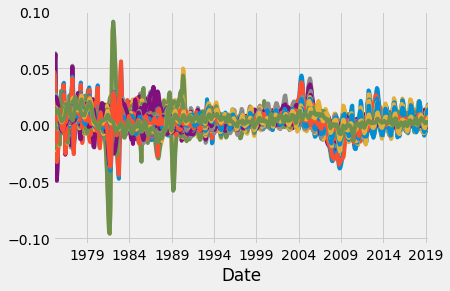

In [19]:
HPI_data.plot()
plt.legend().remove()